# Exploratory Data Analysis (EDA)
## Balanced Multilingual Multicategory Sentiment Dataset

This notebook performs comprehensive exploratory data analysis on the sentiment dataset containing multilingual text data with sentiment labels.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Data

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/balanced_multilingual_multicategory_dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total records: {len(df):,}")

Dataset loaded successfully!
Shape: (24000, 6)
Total records: 24,000


## 2. Basic Information

In [3]:
# Display first few rows
print("="*80)
print("FIRST 5 ROWS")
print("="*80)
df.head()

FIRST 5 ROWS


,text,sentiment,score,language,category,source
0,it is very irritating,-1,0.761369,en,Others,en_silicone_sem
1,Duro tan solo unas horas y dejo de funcionar,-1,0.801707,es,Reviews,es_multilan_amazon
2,"Ua estupenda película que se convierte por méritos propios en uno de los mejores films del año, ...",1,0.599164,es,Others,es_muchocine
3,RT @AristeguiOnline: #Quenosetepase Denuncian amenazas del delegado de Cuajimalpa al portal ‘Sin...,-1,0.067002,es,Social Media,es_twitter_sentiment
4,"Esta bien, pero la encuentro muy blanda.La recomiendo porque precio calidad esta bien y hay gent...",1,0.548400,es,Reviews,es_multilan_amazon


In [4]:
# Dataset info
print("="*80)
print("DATASET INFORMATION")
print("="*80)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       24000 non-null  object 
 1   sentiment  24000 non-null  int64  
 2   score      24000 non-null  float64
 3   language   24000 non-null  object 
 4   category   24000 non-null  object 
 5   source     24000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
# Check for missing values
print("="*80)
print("MISSING VALUES")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df)
print(f"\nTotal missing values: {missing.sum()}")

MISSING VALUES
           Missing Count  Percentage
text                   0         0.0
sentiment              0         0.0
score                  0         0.0
language               0         0.0
category               0         0.0
source                 0         0.0

Total missing values: 0


In [6]:
# Statistical summary
print("="*80)
print("STATISTICAL SUMMARY")
print("="*80)
df.describe(include='all')

STATISTICAL SUMMARY


,text,sentiment,score,language,category,source
count,24000,24000.000000,24000.000000,24000,24000,24000
unique,23999,NaN,NaN,2,4,22
top,good,NaN,NaN,en,Others,es_twitter_sentiment
freq,2,NaN,NaN,12000,6000,3000
mean,NaN,0.000000,0.510661,NaN,NaN,NaN
std,NaN,0.816514,0.265735,NaN,NaN,NaN
min,NaN,-1.000000,0.001831,NaN,NaN,NaN
25%,NaN,-1.000000,0.293801,NaN,NaN,NaN
50%,NaN,0.000000,0.493756,NaN,NaN,NaN
75%,NaN,1.000000,0.727663,NaN,NaN,NaN


## 3. Sentiment Distribution

In [7]:
# Sentiment distribution
print("="*80)
print("SENTIMENT DISTRIBUTION")
print("="*80)
sentiment_counts = df['sentiment'].value_counts().sort_index()
sentiment_pct = df['sentiment'].value_counts(normalize=True).sort_index() * 100

sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage': sentiment_pct
})
print(sentiment_summary)
print(f"\nSentiment labels: -1 (Negative), 0 (Neutral), 1 (Positive)")

SENTIMENT DISTRIBUTION
           Count  Percentage
sentiment                   
-1          8000   33.333333
 0          8000   33.333333
 1          8000   33.333333

Sentiment labels: -1 (Negative), 0 (Neutral), 1 (Positive)


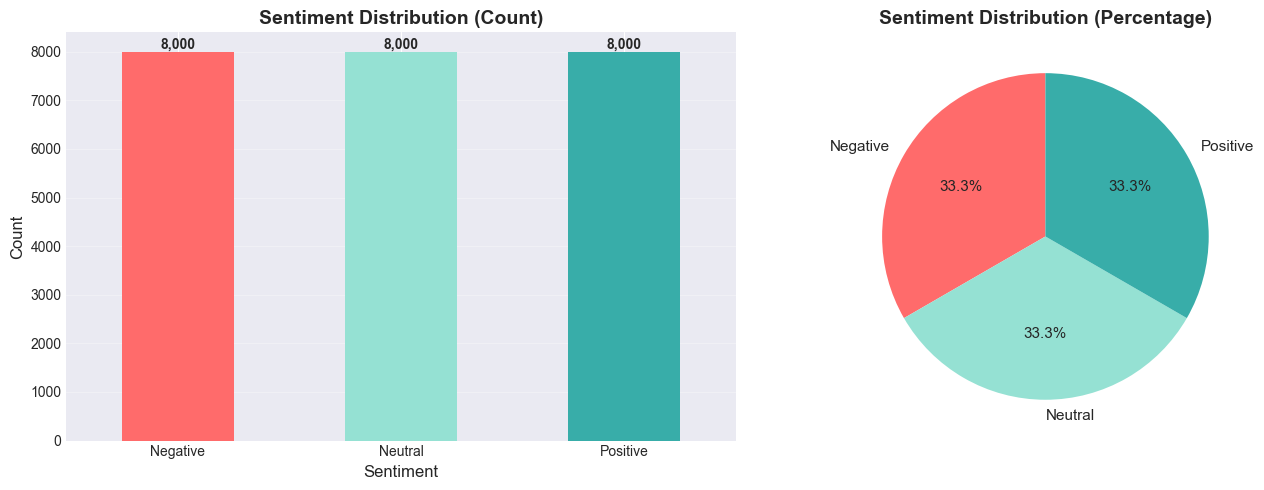

In [8]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
colors = ['#ff6b6b', '#95e1d3', '#38ada9']

ax1 = axes[0]
sentiment_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels([sentiment_labels[x] for x in sentiment_counts.index], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(sentiment_counts):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
ax2.pie(sentiment_counts, labels=[sentiment_labels[x] for x in sentiment_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Language Distribution

In [9]:
# Language distribution
print("="*80)
print("LANGUAGE DISTRIBUTION")
print("="*80)
language_counts = df['language'].value_counts()
language_pct = df['language'].value_counts(normalize=True) * 100

language_summary = pd.DataFrame({
    'Count': language_counts,
    'Percentage': language_pct
})
print(language_summary)

LANGUAGE DISTRIBUTION
          Count  Percentage
language                   
en        12000        50.0
es        12000        50.0


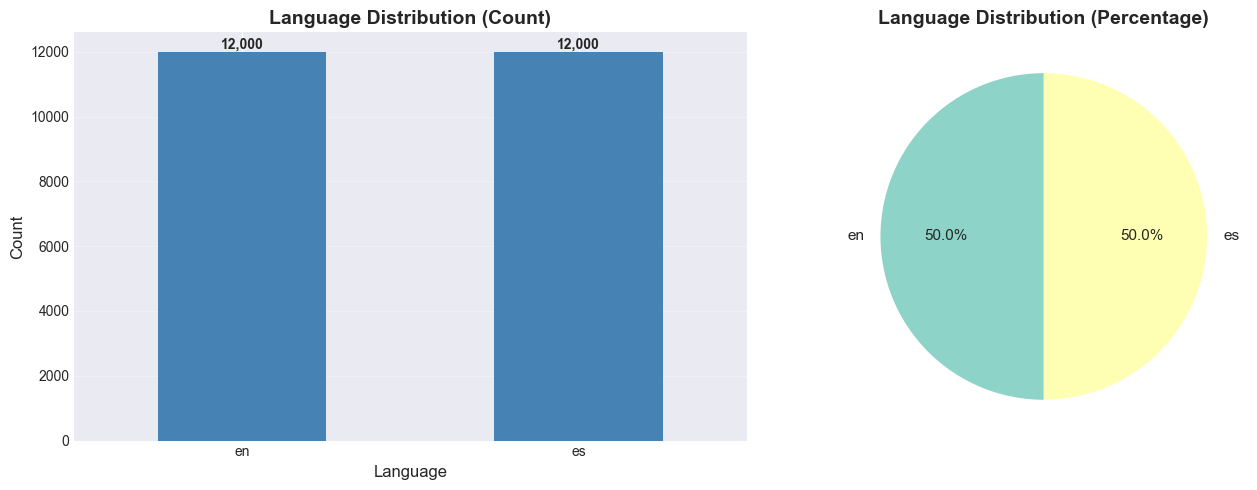

In [10]:
# Visualize language distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
ax1 = axes[0]
language_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Language Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Language', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(language_counts.index, rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(language_counts):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
colors_lang = plt.cm.Set3(range(len(language_counts)))
ax2.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors_lang, textprops={'fontsize': 11})
ax2.set_title('Language Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Category Distribution

In [11]:
# Category distribution
print("="*80)
print("CATEGORY DISTRIBUTION")
print("="*80)
category_counts = df['category'].value_counts()
category_pct = df['category'].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_pct
})
print(category_summary)

CATEGORY DISTRIBUTION
              Count  Percentage
category                       
Others         6000        25.0
Reviews        6000        25.0
Social Media   6000        25.0
News           6000        25.0


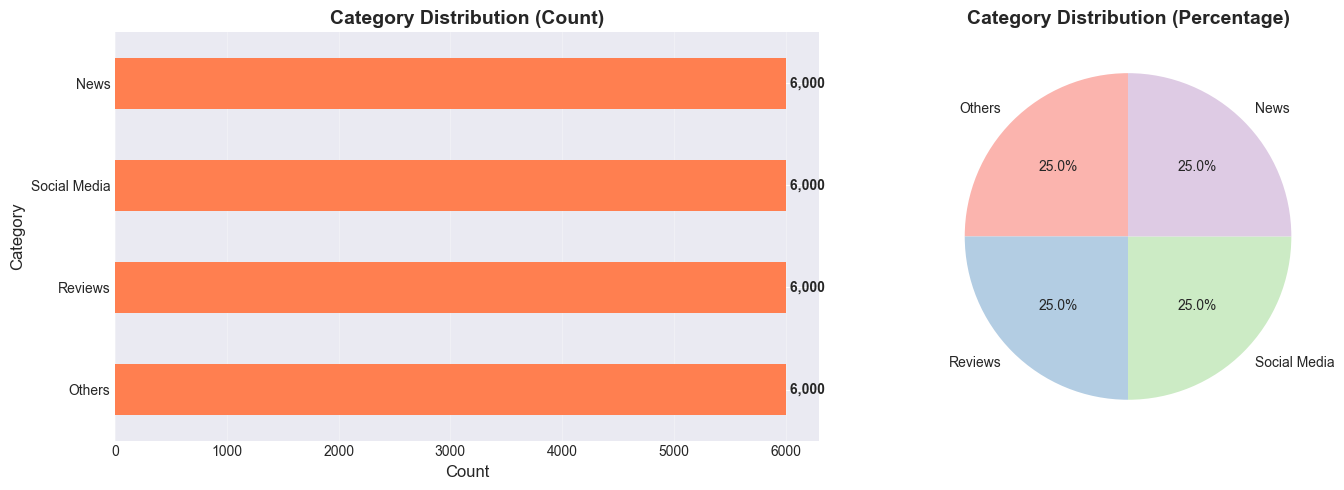

In [12]:
# Visualize category distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
ax1 = axes[0]
category_counts.plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Category Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Category', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(category_counts):
    ax1.text(v, i, f' {v:,}', va='center', fontweight='bold')

# Pie chart
ax2 = axes[1]
colors_cat = plt.cm.Pastel1(range(len(category_counts)))
ax2.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors_cat, textprops={'fontsize': 10})
ax2.set_title('Category Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Source Distribution

In [13]:
# Source distribution
print("="*80)
print("TOP 20 DATA SOURCES")
print("="*80)
source_counts = df['source'].value_counts().head(20)
source_pct = df['source'].value_counts(normalize=True).head(20) * 100

source_summary = pd.DataFrame({
    'Count': source_counts,
    'Percentage': source_pct
})
print(source_summary)
print(f"\nTotal unique sources: {df['source'].nunique()}")

TOP 20 DATA SOURCES
                                           Count  Percentage
source                                                      
es_twitter_sentiment                        3000   12.500000
es_muchocine                                3000   12.500000
es_semeval2020                              3000   12.500000
es_multilan_amazon                          2998   12.491667
en_semeval_2017                             2661   11.087500
en_twitter_sentiment                        2365    9.854167
en_amazon                                   2316    9.650000
en_silicone_meld_s                          1125    4.687500
en_sentistrength                            1010    4.208333
en_multilan_amazon                           617    2.570833
en_tweet_airlines                            415    1.729167
en_per_sent                                  404    1.683333
en_silicone_sem                              370    1.541667
en_vader_nyt                                 210    0.875000
en_v

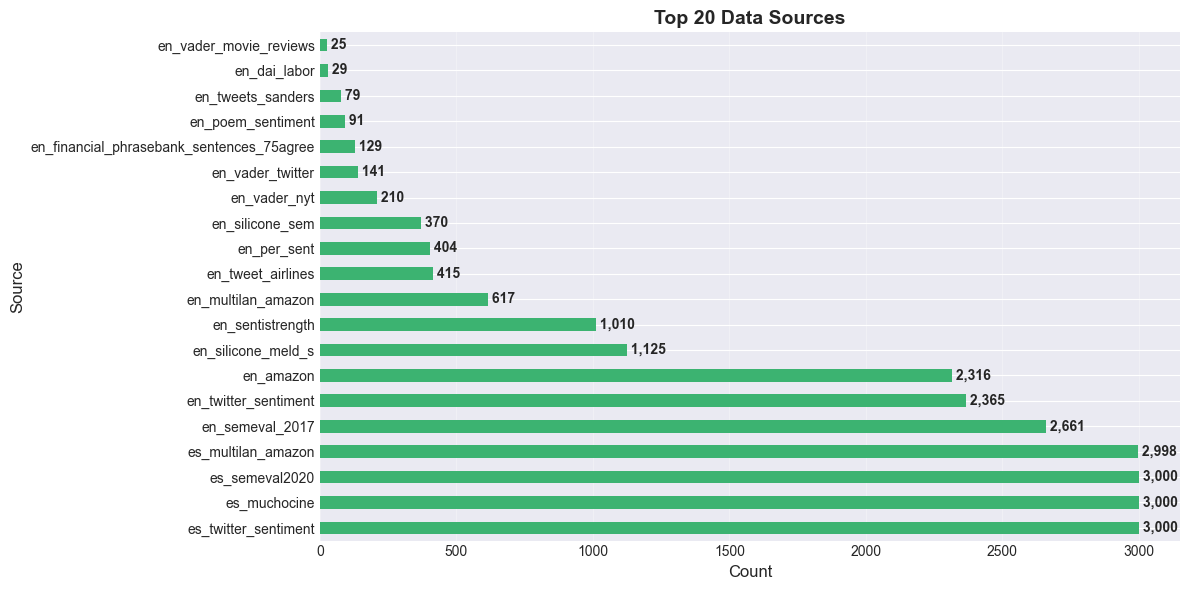

In [14]:
# Visualize top sources
plt.figure(figsize=(12, 6))
source_counts.plot(kind='barh', color='mediumseagreen')
plt.title('Top 20 Data Sources', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(source_counts):
    plt.text(v, i, f' {v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Sentiment Score Analysis

In [15]:
# Score statistics
print("="*80)
print("SENTIMENT SCORE STATISTICS")
print("="*80)
print(df['score'].describe())
print(f"\nScore range: [{df['score'].min():.4f}, {df['score'].max():.4f}]")

SENTIMENT SCORE STATISTICS
count    24000.000000
mean         0.510661
std          0.265735
min          0.001831
25%          0.293801
50%          0.493756
75%          0.727663
max          0.999823
Name: score, dtype: float64

Score range: [0.0018, 0.9998]


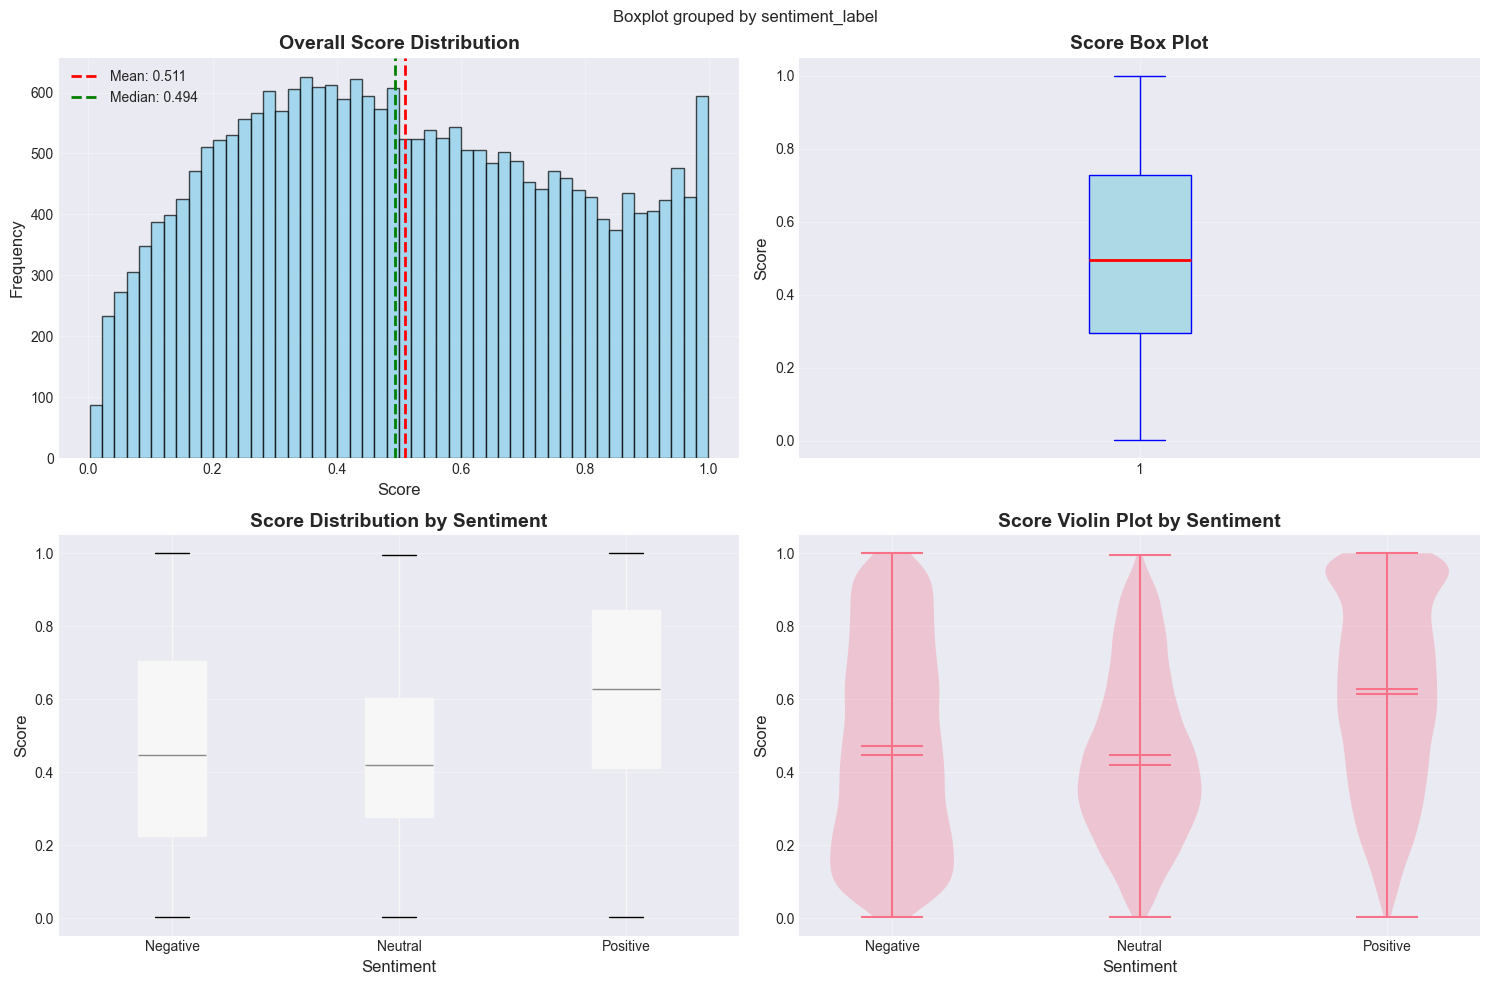

In [16]:
# Visualize score distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall distribution
ax1 = axes[0, 0]
ax1.hist(df['score'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Overall Score Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(alpha=0.3)
ax1.axvline(df['score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["score"].mean():.3f}')
ax1.axvline(df['score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["score"].median():.3f}')
ax1.legend()

# Box plot
ax2 = axes[0, 1]
ax2.boxplot(df['score'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
ax2.set_title('Score Box Plot', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12)
ax2.grid(alpha=0.3)

# Score by sentiment
ax3 = axes[1, 0]
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['sentiment_label'] = df['sentiment'].map(sentiment_labels)
df.boxplot(column='score', by='sentiment_label', ax=ax3, 
           patch_artist=True, grid=False)
ax3.set_title('Score Distribution by Sentiment', fontsize=14, fontweight='bold')
ax3.set_xlabel('Sentiment', fontsize=12)
ax3.set_ylabel('Score', fontsize=12)
ax3.grid(alpha=0.3)
plt.sca(ax3)
plt.xticks(rotation=0)

# Violin plot
ax4 = axes[1, 1]
sentiment_order = ['Negative', 'Neutral', 'Positive']
parts = ax4.violinplot([df[df['sentiment']==sent]['score'].values for sent in [-1, 0, 1]], 
                       positions=[1, 2, 3], showmeans=True, showmedians=True)
ax4.set_title('Score Violin Plot by Sentiment', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sentiment', fontsize=12)
ax4.set_ylabel('Score', fontsize=12)
ax4.set_xticks([1, 2, 3])
ax4.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Drop temporary column
df.drop('sentiment_label', axis=1, inplace=True)